In [9]:
from sympy import *
%matplotlib notebook 
#need ipympl
import math
import matplotlib.pyplot as plt
import numpy as np


In [258]:
def spherical_rad_to_x(theta, phi):#changes theta orientation to fit formula
    return math.sin(math.pi/2 - theta)*math.cos(phi)
def spherical_rad_to_y(theta, phi):#changes theta orientation to fit formula
    return math.sin(math.pi/2 - theta) * math.sin(phi)
def spherical_rad_to_z(theta, phi):#changes theta orientation to fit formula
    return math.cos(math.pi/2 - theta)

def make_unit_vector(vector):
    mag = magnitude(vector)
    return [vector[0]/mag, vector[1]/mag, vector[2]/mag]
def spherical_rad_to_xyz(theta, phi):#theta, phi in rad w/ theta, phi = 0 on x axis. 
    return [spherical_rad_to_x(theta, phi), spherical_rad_to_y(theta, phi), spherical_rad_to_z(theta, phi)]

def spherical_to_xyz(theta, phi):#takes in deg. returns a unit vector with pitch = theta, rotation = phi
    return spherical_rad_to_xyz(math.radians(theta), math.radians(phi))

def dot_product_rad_spherical(theta_1, phi_1, theta_2, phi_2):
    return spherical_rad_to_x(theta_1, phi_1) * spherical_rad_to_x(theta_2, phi_2) + \
    spherical_rad_to_y(theta_1, phi_1) * spherical_rad_to_y(theta_2, phi_2) + \
    spherical_rad_to_z(theta_1, phi_1) * spherical_rad_to_z(theta_2, phi_2)

def dot_product_spherical(theta_1, phi_1, theta_2, phi_2):
    return dot_product_rad_spherical(math.radians(theta_1), math.radians(phi_1), math.radians(theta_2), math.radians(phi_2))

def dot_product(vector_1, vector_2):
    return vector_1[0] * vector_2[0] + vector_1[1] * vector_2[1] + vector_1[2] * vector_2[2]

def magnitude(vec):
    return math.sqrt(vec[0]**2 + vec[1]**2 + vec[2]**2)

def solve_for_coords(v_1, v_2, t_1, t_2): #don't ask. it works.
    #solves for z's two solutions given inputs of the photodiode vectors that got valid inputs + their inputs
    s_1x = v_1[0]
    s_1y = v_1[1]
    s_1z = v_1[2]

    s_2x = v_2[0]
    s_2y = v_2[1]
    s_2z = v_2[2]
    
    z_sols = [-(s_1x*s_2y - s_1y*s_2x)*sqrt(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - s_1x**2*t_2**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + 2*s_1x*s_2x*t_1*t_2 + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - s_1y**2*t_2**2 - 2*s_1y*s_1z*s_2y*s_2z + 2*s_1y*s_2y*t_1*t_2 + s_1z**2*s_2x**2 + s_1z**2*s_2y**2 - s_1z**2*t_2**2 + 2*s_1z*s_2z*t_1*t_2 - s_2x**2*t_1**2 - s_2y**2*t_1**2 - s_2z**2*t_1**2)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2) + (s_1x**2*s_2z*t_2 - s_1x*s_1z*s_2x*t_2 - s_1x*s_2x*s_2z*t_1 + s_1y**2*s_2z*t_2 - s_1y*s_1z*s_2y*t_2 - s_1y*s_2y*s_2z*t_1 + s_1z*s_2x**2*t_1 + s_1z*s_2y**2*t_1)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2),
             (s_1x*s_2y - s_1y*s_2x)*sqrt(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - s_1x**2*t_2**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + 2*s_1x*s_2x*t_1*t_2 + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - s_1y**2*t_2**2 - 2*s_1y*s_1z*s_2y*s_2z + 2*s_1y*s_2y*t_1*t_2 + s_1z**2*s_2x**2 + s_1z**2*s_2y**2 - s_1z**2*t_2**2 + 2*s_1z*s_2z*t_1*t_2 - s_2x**2*t_1**2 - s_2y**2*t_1**2 - s_2z**2*t_1**2)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2) + (s_1x**2*s_2z*t_2 - s_1x*s_1z*s_2x*t_2 - s_1x*s_2x*s_2z*t_1 + s_1y**2*s_2z*t_2 - s_1y*s_1z*s_2y*t_2 - s_1y*s_2y*s_2z*t_1 + s_1z*s_2x**2*t_1 + s_1z*s_2y**2*t_1)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2)]
    sols = []
    for z in z_sols:
        x = (s_1y*s_2z*z - s_1y*t_2 - s_1z*s_2y*z + s_2y*t_1)/(s_1x*s_2y - s_1y*s_2x)
        y = (-s_1x*s_2z*z + s_1x*t_2 + s_1z*s_2x*z - s_2x*t_1)/(s_1x*s_2y - s_1y*s_2x)
        sols.append({"x": x, "y": y, "z": z})
    return sols
    


In [343]:
#environment setup
general_pitch = 20
max_angle = 75
minimal_reading = math.cos(math.radians(max_angle))#minimal theta of which, at cosines greater than it, measurements become unreliable.

class OnePhotodiodeNode():
    def __init__(self, theta, phi):
        self.vector = spherical_to_xyz(theta, phi)
    def run_sim(self, real_sun_theta, real_sun_phi, fast_solve):
        real_sun_vector = Matrix(spherical_to_xyz(real_sun_theta, real_sun_phi))
        real_sun_unit_vector = make_unit_vector(real_sun_vector)
        vector_cos = max(minimal_reading, dot_product(self.vector, real_sun_unit_vector))
        if(vector_cos > minimal_reading):
            return [[self.vector, vector_cos]]
        else:
            return None

class ThreePhotodiodeNode():
    def __init__(self, pitch, rotation, phis):#rotation as a euler angle vector
        self.vector_1 = rotation.apply(spherical_to_xyz(pitch, phis[0]))
        self.vector_2 = rotation.apply(spherical_to_xyz(pitch, phis[1]))
        self.vector_3 = rotation.apply(spherical_to_xyz(pitch, phis[2]))
    def run_sim(self, real_sun_theta, real_sun_phi, fast_solve = True, diagnostics = False, checkDP = False):#in degrees
        real_sun_vector = spherical_to_xyz(real_sun_theta, real_sun_phi)
        real_sun_unit_vector = make_unit_vector(real_sun_vector)
        if(real_sun_unit_vector[0] < 0.001 or real_sun_unit_vector[1] < 0.001 or real_sun_unit_vector[2] < 0.001):
            fast_solve = False
        
        vector_1_cos_reading = max(minimal_reading, dot_product(self.vector_1, real_sun_unit_vector))
        vector_2_cos_reading = max(minimal_reading, dot_product(self.vector_2, real_sun_unit_vector))
        vector_3_cos_reading = max(minimal_reading, dot_product(self.vector_3, real_sun_unit_vector))
        successful_readings = list(filter(lambda x: x>minimal_reading, [vector_1_cos_reading, vector_2_cos_reading, vector_3_cos_reading]))
        x = Symbol('x')
        y = Symbol('y')
        z = Symbol('z')
        if(len(successful_readings) == 0):
            return None
        elif(len(successful_readings) == 1):
            #1 or 0 inputs being valid should mean that 3 other faces (should) have it a whole lot better.
            #we don't want to use this face
            if(vector_1_cos_reading in successful_readings):
                return [[self.vector_1, vector_1_cos_reading]]
            elif(vector_2_cos_reading in successful_readings):
                return [[self.vector_2, vector_2_cos_reading]]
            else:
                return [[self.vector_3, vector_3_cos_reading]]
        elif(len(successful_readings) == 2):#if 2 inputs valid
            if(not (vector_1_cos_reading in successful_readings)):
                unit_vecs = []
                if(fast_solve):
                    t_1 = vector_2_cos_reading
                    t_2 = vector_3_cos_reading
                    sols = solve_for_coords(self.vector_2, self.vector_3, t_1, t_2)
                    for sol in sols:
                        unit_vecs.append([sol["x"], sol["y"], sol["z"]])
                else:
                    sols = solve([self.vector_2[0]*x + self.vector_2[1] * y + self.vector_2[2] * z - vector_2_cos_reading,
                         self.vector_3[0]*x + self.vector_3[1] * y + self.vector_3[2] * z - vector_3_cos_reading,
                      x**2 + y**2 + z**2 - 1], check = False)
                    for sol in sols:
                        unit_vecs.append([sol[x], sol[y], sol[z]])
                to_ret = []
                for unit_vector in unit_vecs:
                    try:
                        unit_vector = make_unit_vector(unit_vector)
                    except:
                        continue
                    if(checkDP):
                        dotprod = np.dot(self.vector_1, unit_vector)
                        if(abs(math.degrees(math.acos(dotprod)) >= 70)):
                            to_ret.append(unit_vector)
                    else:
                        to_ret.append(unit_vector)
                if(len(to_ret) == 0):
                    return None
                else:
                    if(magnitude(vector_subtraction(to_ret[0], to_ret[1])) < 0.05):
                        return [[self.vector_2, vector_2_cos_reading]]
                    return to_ret
            elif(not (vector_2_cos_reading in successful_readings)):
                unit_vecs = []
                if(fast_solve):
                    t_1 = vector_1_cos_reading
                    t_2 = vector_3_cos_reading
                    sols = solve_for_coords(self.vector_1, self.vector_3, t_1, t_2)
                    for sol in sols:
                        unit_vecs.append([sol["x"], sol["y"], sol["z"]])
                else:
                    sols = solve([self.vector_1[0]*x + self.vector_1[1] * y + self.vector_1[2] * z - vector_1_cos_reading,
                         self.vector_3[0]*x + self.vector_3[1] * y + self.vector_3[2] * z - vector_3_cos_reading,
                      x**2 + y**2 + z**2 - 1], check = False)
                    for sol in sols:
                        unit_vecs.append([sol[x], sol[y], sol[z]])
                to_ret = []
                for unit_vector in unit_vecs:
                    try:
                        unit_vector = make_unit_vector(unit_vector)
                    except:
                        continue
                    if(checkDP):
                        dotprod = np.dot(self.vector_2, unit_vector)
                        if(abs(math.degrees(math.acos(dotprod)) >= 70)):
                            to_ret.append(unit_vector)

                    else:
                        to_ret.append(unit_vector)
                if(len(to_ret) == 0):
                    return None
                else:
                    if(magnitude(vector_subtraction(to_ret[0], to_ret[1])) < 0.05):
                        return [[self.vector_1, vector_1_cos_reading]]
                    return to_ret
            elif(not (vector_3_cos_reading in successful_readings)):
                unit_vecs = []
                if(fast_solve):
                    t_1 = vector_1_cos_reading
                    t_2 = vector_2_cos_reading
                    
                    sols = solve_for_coords(self.vector_1, self.vector_2, t_1, t_2)
                    for sol in sols:
                        unit_vecs.append([sol["x"], sol["y"], sol["z"]])
                else:
                    sols = solve([self.vector_1[0]*x + self.vector_1[1] * y + self.vector_1[2] * z - vector_1_cos_reading,
                         self.vector_2[0]*x + self.vector_2[1] * y + self.vector_2[2] * z - vector_2_cos_reading,
                      x**2 + y**2 + z**2 - 1], check = False)
                    for sol in sols:
                        unit_vecs.append([sol[x], sol[y], sol[z]])
                to_ret = []
                for unit_vector in unit_vecs:
                    #print(unit_vector)
                    try:
                        unit_vector = make_unit_vector(unit_vector)
                    except:
                        continue
                    if(checkDP):
                        dotprod = np.dot(self.vector_3, unit_vector)
                        if(abs(math.degrees(math.acos(dotprod)) >= 70)):
                            to_ret.append(unit_vector)
                    else:
                        to_ret.append(unit_vector)
                if(len(to_ret) == 0):
                    return None
                else:
                    if(magnitude(vector_subtraction(to_ret[0], to_ret[1])) < 0.05):
                        return [[self.vector_1, vector_1_cos_reading]]
                    return to_ret
            else:
                return None
        else:
            mat = Matrix([np.append(self.vector_1, [(vector_1_cos_reading)]),
                           np.append(self.vector_2, [(vector_2_cos_reading)]),
                          np.append(self.vector_3, [(vector_3_cos_reading)])])
            row = Matrix.rref(mat)[0].col(3)
            unit_vector = row/magnitude(row)
            return [unit_vector.T.tolist()[0]]


In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
ax.set_zlim(-1.25, 1.25)
def create_vec(unit_vector, color, mag):
    ax.quiver([0], [0], [0], [unit_vector[0] * mag], [unit_vector[1] * mag], [unit_vector[2] * mag], color = color)
def create_pt(unit_vector, color, thickness = 1):
    ax.scatter(unit_vector[0], unit_vector[1], unit_vector[2], c = color, s = thickness)


In [1]:
from scipy.spatial.transform import Rotation as R
node_1 = ThreePhotodiodeNode(30, R.from_euler('X', 0, degrees = True), [0, 120, 240])
node_2 = ThreePhotodiodeNode(30, R.from_euler('X', 90, degrees = True), [0, 120, 240])
node_3 = ThreePhotodiodeNode(30, R.from_euler('X', 180, degrees = True), [0, 120, 240])
node_4 = ThreePhotodiodeNode(30, R.from_euler('X', 270, degrees = True), [0, 120, 240])
# node_5 = ThreePhotodiodeNode(20, R.from_euler('Y', 90, degrees = True), [0, 120, 240])
# node_6 = ThreePhotodiodeNode(20, R.from_euler('Y', -90, degrees = True), [0, 120, 240])
node_5 = OnePhotodiodeNode(180, 0)
node_6 = OnePhotodiodeNode(0, 0)
nodes = [node_1, node_2, node_3, node_4, node_5, node_6]
acceptable_thres = 0.05

def vector_subtraction(vector_1, vector_2):
    return [vector_1[0] - vector_2[0], vector_1[1] - vector_2[1], vector_1[2] - vector_2[2]]
def about_in(vector, list_of_vectors, thresh):
    for vector_2 in list_of_vectors:
        if(magnitude(vector_subtraction(vector, vector_2)) < thresh):
            return True
    return False

for t_1 in range(0, 360, 30):
    for p_1 in range(0, 360, 30):
        #print(t_1, p_1)
        #print(t_1, p_1)
        real_sun_vector = spherical_to_xyz(t_1, p_1)
        real_sun_unit_vector = make_unit_vector(real_sun_vector)
        sims = list(map(lambda x : x.run_sim(t_1, p_1, fast_solve = True), nodes))
        results = []
        dp_checks = []
        for returned_index in range(len(sims)):
            if(not sims[returned_index] == None):
                for result in sims[returned_index]:
                    if(len(result) == 3):
                        results.append([result, returned_index])
                    else:
                        dp_checks.append([result, returned_index])
        final_answer = None
        final_answer_owner = None
        for possibility_index in range(len(results)):
            if(about_in(results[possibility_index][0], [item[0] for item in results[possibility_index + 1:]], 0.0000002)):
                final_answer = results[possibility_index][0]
                final_answer_owner = results[possibility_index][1]
                break
            else:
                if(len(dp_checks) > 0):
                    failed = False
                    for dp_check in dp_checks:
                        if(abs(dot_product(dp_check[0][0], results[possibility_index][0]) - dp_check[0][1]) > 0.0005):
                            failed = True
                            break
                    if(not failed):
                        final_answer = results[possibility_index][0]
                        final_answer_owner = results[possibility_index][1]
                        break
                
        if(len(results) == 0 or final_answer == None):
            if(len(dp_checks) >= 3):
                mat = Matrix([np.append(dp_checks[0][0][0], [dp_checks[0][0][1]]),
                           np.append(dp_checks[1][0][0], [dp_checks[1][0][1]]),
                          np.append(dp_checks[2][0][0], [dp_checks[2][0][1]])])
                
                row = Matrix.rref(mat)[0].col(3)
                unit_vector = row/magnitude(row)
                final_answer = unit_vector.T.tolist()[0]
                if(magnitude(vector_subtraction(final_answer, real_sun_unit_vector)) < acceptable_thres):
                    create_pt(real_sun_unit_vector, 'g')
                else:
                    print("DP CHECK FAILURE")
                    print("dp_checks: " + str(dp_checks))
                    print("sims: " + str(sims))
                    print("rsuv: " + str(real_sun_unit_vector))
                    
                    create_pt(real_sun_unit_vector, 'r')
            else:
                create_pt(real_sun_unit_vector, 'm')
        else:            
            if(magnitude(vector_subtraction(final_answer, real_sun_unit_vector)) < acceptable_thres):
                create_pt(real_sun_unit_vector, 'g')
            else:
                print(t_1, p_1)
                print("final_answer: " + str(final_answer))
                print("final_answer_owner: " + str(final_answer_owner))
                print("results: " + str(results))
                print("dp checks: " + str(dp_checks))
                print("sims: " + str(sims))
                print("rsuv: " + str(real_sun_unit_vector))
                
                create_pt(real_sun_unit_vector, 'r')
        
plt.show()

            

NameError: name 'ThreePhotodiodeNode' is not defined

In [324]:
print(node_4.run_sim(30, 60))
sun_v = spherical_to_xyz(0, 120)
# print(spherical_to_xyz(0, 120))
# print(dot_product(node_4.vector_1, sun_v))
# print(node_4.vector_2)
# print(node_4.vector_3)
# print(dot_product(node_4.vector_2, sun_v))
# print(dot_product(node_4.vector_3, sun_v))

None


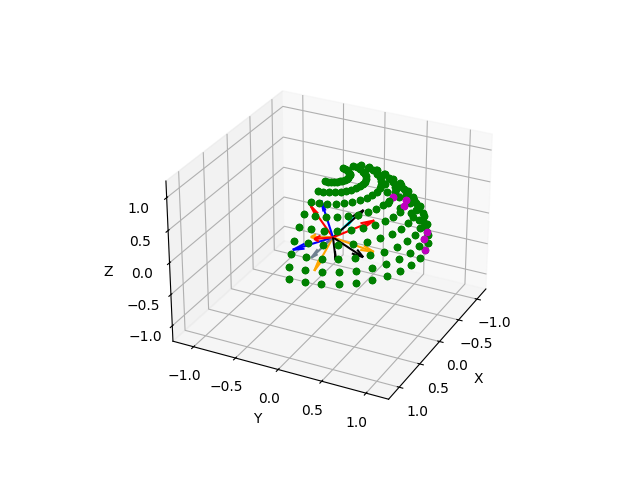

In [325]:
create_vec(node_1.vector_1, 'r', 0.5)
create_vec(node_1.vector_2, 'r', 0.5)
create_vec(node_1.vector_3, 'r', 0.5)
create_vec(node_2.vector_1, 'b', 0.5)
create_vec(node_2.vector_2, 'b', 0.5)
create_vec(node_2.vector_3, 'b', 0.5)
create_vec(node_3.vector_1, 'orange', 0.5)
create_vec(node_3.vector_2, 'orange', 0.5)
create_vec(node_3.vector_3, 'orange', 0.5)
create_vec(node_4.vector_1, 'k', 0.5)
create_vec(node_4.vector_2, 'k', 0.5)
create_vec(node_4.vector_3, 'k', 0.5)
create_vec(node_5.vector, 'cyan', 0.5)
create_vec(node_6.vector, 'slategrey', 0.5)
# create_vec(node_5.vector_1, 'cyan', 0.5)
# create_vec(node_5.vector_2, 'cyan', 0.5)
# create_vec(node_5.vector_3, 'cyan', 0.5)
# create_vec(node_6.vector_1, 'slategrey', 0.5)
# create_vec(node_6.vector_2, 'slategrey', 0.5)
# create_vec(node_6.vector_3, 'slategrey', 0.5)
plt.show()

The cell below describes how solve_for_coords came to be

In [253]:
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
s_1x = Symbol('s_1x')
s_1y = Symbol('s_1y')
s_1z = Symbol('s_1z')
s_2x = Symbol('s_2x')
s_2y = Symbol('s_2y')
s_2z = Symbol('s_2z')
t_1 = Symbol('t_1')
t_2 = Symbol('t_2')

solve([s_1x*x + s_1y*y + s_1z*z - t_1, s_2x*x + s_2y*y + s_2z*z - t_2], [x, y])
x = solve([((s_1y*s_2z*z - s_1y*t_2 - s_1z*s_2y*z + s_2y*t_1)/(s_1x*s_2y - s_1y*s_2x))**2 + \
      ((-s_1x*s_2z*z + s_1x*t_2 + s_1z*s_2x*z - s_2x*t_1)/(s_1x*s_2y - s_1y*s_2x))**2 + z**2 - 1], z)

In [256]:
print(x[0][0])

-(s_1x*s_2y - s_1y*s_2x)*sqrt(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - s_1x**2*t_2**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + 2*s_1x*s_2x*t_1*t_2 + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - s_1y**2*t_2**2 - 2*s_1y*s_1z*s_2y*s_2z + 2*s_1y*s_2y*t_1*t_2 + s_1z**2*s_2x**2 + s_1z**2*s_2y**2 - s_1z**2*t_2**2 + 2*s_1z*s_2z*t_1*t_2 - s_2x**2*t_1**2 - s_2y**2*t_1**2 - s_2z**2*t_1**2)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2) + (s_1x**2*s_2z*t_2 - s_1x*s_1z*s_2x*t_2 - s_1x*s_2x*s_2z*t_1 + s_1y**2*s_2z*t_2 - s_1y*s_1z*s_2y*t_2 - s_1y*s_2y*s_2z*t_1 + s_1z*s_2x**2*t_1 + s_1z*s_2y**2*t_1)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2)


In [257]:
print(x[1][0])

(s_1x*s_2y - s_1y*s_2x)*sqrt(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - s_1x**2*t_2**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + 2*s_1x*s_2x*t_1*t_2 + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - s_1y**2*t_2**2 - 2*s_1y*s_1z*s_2y*s_2z + 2*s_1y*s_2y*t_1*t_2 + s_1z**2*s_2x**2 + s_1z**2*s_2y**2 - s_1z**2*t_2**2 + 2*s_1z*s_2z*t_1*t_2 - s_2x**2*t_1**2 - s_2y**2*t_1**2 - s_2z**2*t_1**2)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2) + (s_1x**2*s_2z*t_2 - s_1x*s_1z*s_2x*t_2 - s_1x*s_2x*s_2z*t_1 + s_1y**2*s_2z*t_2 - s_1y*s_1z*s_2y*t_2 - s_1y*s_2y*s_2z*t_1 + s_1z*s_2x**2*t_1 + s_1z*s_2y**2*t_1)/(s_1x**2*s_2y**2 + s_1x**2*s_2z**2 - 2*s_1x*s_1y*s_2x*s_2y - 2*s_1x*s_1z*s_2x*s_2z + s_1y**2*s_2x**2 + s_1y**2*s_2z**2 - 2*s_1y*s_1z*s_2y*s_2z + s_1z**2*s_2x**2 + s_1z**2*s_2y**2)


In [201]:
solve_for_coords(-0.469846310392954,
0.8137976813493737,
0.3420201433256688,
-0.4698463103929546,
-0.8137976813493734,
0.3420201433256688,
0.5797694655894312,
0.5797694655894317)

[{'x': -0.556752145847121, 'y': 8.27424979605035e-17, 'z': 0.531469212806028},
 {'x': -0.475718979865645, 'y': 5.44603130584734e-17, 'z': 0.642787609686539}]

In [230]:
plt.clf()

In [211]:
spherical_to_xyz(0, 0)
spherical_to_xyz(180, 0)

[-1.0, -0.0, 6.123233995736766e-17]

In [228]:
a = [1, 2, 3]
print(a[1])
print(a[2:])

2
[3]


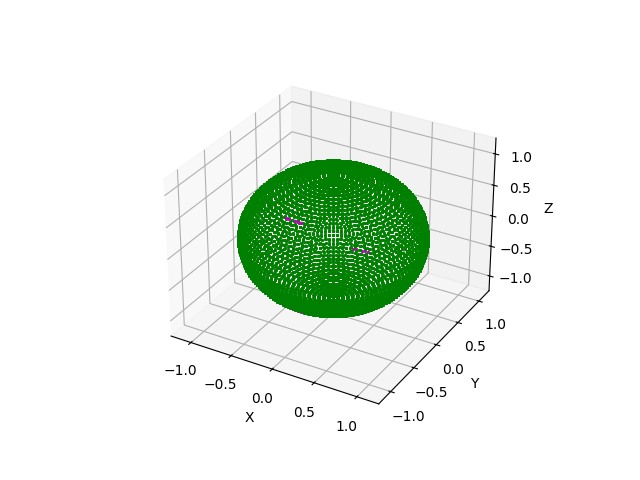

In [342]:
plt.show()
